In [1]:
from functions import *
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from scipy.stats import chi2_contingency
from scipy.stats.contingency import association

In [2]:
url_1 = 'https://raw.githubusercontent.com/data-bootcamp-v4/lessons/main/5_6_eda_inf_stats_tableau/project/files_for_project/df_final_demo.txt'
url_2 = 'https://raw.githubusercontent.com/data-bootcamp-v4/lessons/main/5_6_eda_inf_stats_tableau/project/files_for_project/df_final_experiment_clients.txt'
url_3 = 'https://raw.githubusercontent.com/data-bootcamp-v4/lessons/main/5_6_eda_inf_stats_tableau/project/files_for_project/df_final_web_data_pt_1.txt'
url_4 = 'https://raw.githubusercontent.com/data-bootcamp-v4/lessons/main/5_6_eda_inf_stats_tableau/project/files_for_project/df_final_web_data_pt_2.txt'

In [3]:
client_profile = pd.read_csv(url_1)
exp_client = pd.read_csv(url_2)

In [4]:
df_1 = pd.read_csv(url_3, parse_dates=['date_time'])
df_2 = pd.read_csv(url_4, parse_dates=['date_time'])

In [5]:
# Concat Digital Footprints (df_final_web_data) pt_1 and pt_2 into one file:
df = pd.concat([df_1, df_2])

# Remove duplicated rows in merged digital footprints file 'df'
# df.duplicated().sum() - there are 10764 duplicated rows
df.drop_duplicates(inplace=True)

In [6]:
# Merge client profiles file (df_final_demo.txt) with experiment roster (df_final_experiment_clients.txt)

clients = pd.merge(client_profile, exp_client, on='client_id', how='outer')

In [7]:
# Cleaning 'clients' file:
# 1. Fill rows wiht NaN value in 'Variation' column with 'Uknown' - 20109 rows
# 2. Drop row with NaN value in 'gender' column - 12 rows
# 3. Drop rows with 'X' value in 'gender column' - 2 rows
# 4. Drop row with NaN value in 'age' column - 1 row

#1
#clients = clients.dropna(subset=['Variation']) 
clients['Variation'] = clients['Variation'].fillna('Unknown')

#2
clients = clients.dropna(subset=['gendr']) 

#3
clients.drop(clients[clients['gendr'] == 'X'].index, inplace=True)

#4
clients = clients.dropna(subset=['clnt_age']) 

In [8]:
# Call functions to calculate average step duration, nr of clients who confirmed, nr of visits, nr of confirmations per client, errors

df_avg_step_durations = calc_avg_step_duration(df)

clients_who_confirmed = clients_who_finished(df)
clients_who_confirmed = clients_who_confirmed.set_index('client_id').sort_values(by='client_id')

df_client_visits = nr_of_visits(df)

#df_client_error = detect_process_errors(df)
df_client_change = detect_process_changes(df)

df_client_confirms = nr_of_confirms(df)

In [9]:
# Call funtion 'data_summary' to create data frame with web data summary

dfs =[df_client_visits, clients_who_confirmed, df_avg_step_durations, df_client_confirms, df_client_change]

web_data_summary = data_summary(dfs)

In [10]:
# df_avg_step_durations
web_data_summary.head()

,no_of_visits,is_confirmed,step_duration,no_of_confirms,had_error,error_count,had_progress,progress_count
client_id,,,,,,,,
169,1,True,0 days 00:00:53.250000,1,False,0,True,4
336,1,False,0 days 00:15:48,0,False,0,False,0
546,1,True,0 days 00:00:33.250000,1,False,0,True,4
555,1,True,0 days 00:00:39.500000,1,False,0,True,4
647,1,True,0 days 00:01:34.250000,1,False,0,True,4


In [11]:
# clients_who_confirmed

In [12]:
# df_client_visits

In [13]:
# df_client_error

In [14]:
# df_client_confirms

In [15]:
web_data_summary

,no_of_visits,is_confirmed,step_duration,no_of_confirms,had_error,error_count,had_progress,progress_count
client_id,,,,,,,,
169,1,True,0 days 00:00:53.250000,1,False,0,True,4
336,1,False,0 days 00:15:48,0,False,0,False,0
546,1,True,0 days 00:00:33.250000,1,False,0,True,4
555,1,True,0 days 00:00:39.500000,1,False,0,True,4
647,1,True,0 days 00:01:34.250000,1,False,0,True,4
...,...,...,...,...,...,...,...,...
9999729,3,True,0 days 00:01:07.500000,1,True,2,True,7
9999768,1,True,0 days 00:00:44.181818181,1,True,3,True,7
9999832,1,False,0 days 00:00:08,0,False,0,True,1


In [16]:
# Merge web_data_summary with 'clients' data frame

all = pd.merge(clients, web_data_summary, on='client_id', how='outer')

# Drop rows with NaN values
all = all.dropna()

In [17]:
all['Variation'].value_counts(dropna=False)

Variation
Test       26959
Control    23526
Unknown    20106
Name: count, dtype: int64

In [18]:
# Divide the merged data frame into test, control and unknown groups

groups = all.groupby('Variation')

# Accessing groups and creating new DataFrames
test = groups.get_group('Test')
control = groups.get_group('Control')
unknown = groups.get_group('Unknown')

In [19]:
test['is_confirmed'].value_counts()

is_confirmed
True     18682
False     8277
Name: count, dtype: int64

In [20]:
control['is_confirmed'].value_counts()

is_confirmed
True     15428
False     8098
Name: count, dtype: int64

In [21]:
# sns.histplot(data=control, x='is_confirmed', bins=2)

## **Completion Rate:** The proportion of users who reach the final ‘confirm’ step.



In [56]:
all

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,no_of_visits,is_confirmed,step_duration,no_of_confirms,had_error,error_count
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test,2,True,0 days 00:03:46,3,False,0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control,1,True,0 days 00:00:59,1,False,0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,Test,2,False,0 days 00:00:39,0,True,1
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,Test,1,False,0,0,False,0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,Control,1,False,0,0,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70586,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0,Unknown,3,True,0 days 00:05:15.500000,4,False,0
70587,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0,Unknown,1,True,0 days 00:01:15.571428571,2,True,1
70588,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0,Unknown,1,True,0 days 00:04:48.750000,1,False,0
70589,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0,Unknown,5,False,0 days 00:00:22.250000,0,True,3


In [57]:
# part = pd.merge(clients, df, on='client_id', how='outer')

In [58]:
# whole = pd.merge(part, web_data_summary, on='client_id', how='outer')

In [59]:
# whole.dropna(inplace=True)

In [60]:
# whole['client_id'].nunique()

In [61]:
all['client_id'].nunique(), all.shape

(70591, (70591, 16))

In [62]:
all['Variation'].value_counts()

Variation
Test       26959
Control    23526
Unknown    20106
Name: count, dtype: int64

In [22]:
#filtered = whole[whole['Variation'].isin(['Test', 'Control'])]

filtered = all[all['Variation'].isin(['Test', 'Control'])]

In [23]:
#CSV Generation: 
filtered_csv_link = 'data/src/filtered.csv'
filtered.to_csv(filtered_csv_link, index=False)

In [24]:
# Frequency table for 'MSZoning'
filtered.groupby('Variation')['is_confirmed'].value_counts()

Variation  is_confirmed
Control    True            15428
           False            8098
Test       True            18682
           False            8277
Name: count, dtype: int64

In [25]:
# Calculating the proportion of each unique value in the 'MSZoning'
filtered.groupby('Variation')['is_confirmed'].value_counts(normalize=True)

Variation  is_confirmed
Control    True            0.655785
           False           0.344215
Test       True            0.692978
           False           0.307022
Name: proportion, dtype: float64

In [20]:
pd.DataFrame(filtered['Variation'].value_counts(ascending=True))

,count
Variation,
Control,23526
Test,26959


In [21]:
filtered.groupby('Variation')['is_confirmed'].sum()

Variation
Control    15428
Test       18682
Name: is_confirmed, dtype: int64

In [22]:
crosstab_result = pd.crosstab(index=filtered['Variation'], columns=filtered['is_confirmed'])

In [23]:
crosstab_result['Total_nr_of_clients'] = filtered['Variation'].value_counts(ascending=True)

In [31]:
crosstab_result

,Nr_of_confirmed,Total_nr_of_clients,%_of_confirmed
Variation,,,
Control,15428,23526,65.58
Test,18682,26959,69.30


In [28]:
# crosstab_result.drop(False,axis=1, inplace=True)

In [29]:
crosstab_result['% of_confirmed'] = round(crosstab_result[True]/crosstab_result['Total_nr_of_clients']*100, 2)

In [30]:
crosstab_result.columns = ['Nr_of_confirmed', 'Total_nr_of_clients', '%_of_confirmed']

<Axes: xlabel='Variation', ylabel='count'>

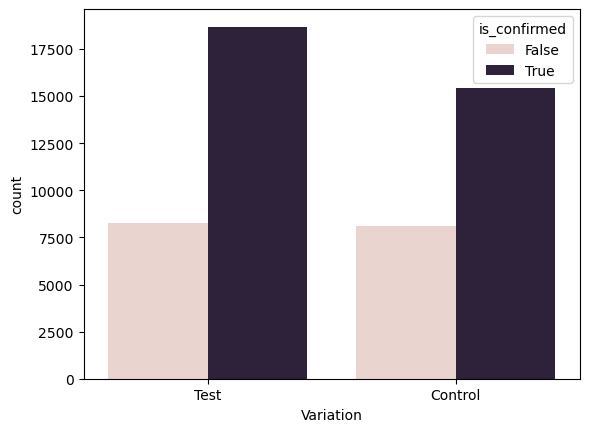

In [77]:
from matplotlib.colors import Normalize

sns.countplot(data=filtered, x='Variation', hue='is_confirmed', hue_norm=Normalize())

# it seem there is no change

In [79]:
# sns.countplot(data=filtered, x='Variation', hue='is_confirmed')

<Axes: xlabel='Variation', ylabel='Count'>

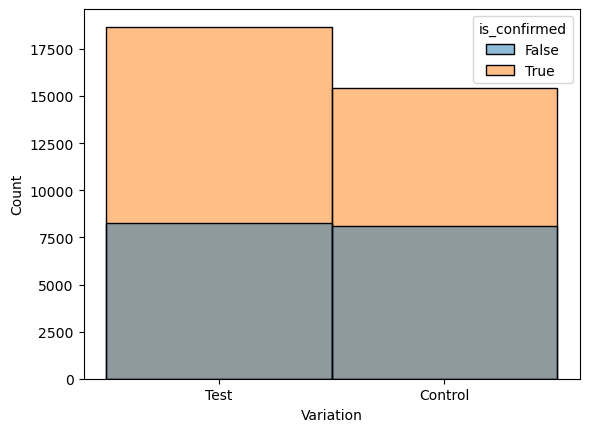

In [116]:
sns.histplot(data=filtered, x='Variation', hue='is_confirmed )

In [32]:
total_test = len(filtered[filtered['Variation']=='Test'])

In [33]:
total_control = len(filtered[filtered['Variation']=='Control'])

In [34]:
confirmed_test = filtered[filtered['Variation']=='Test']['is_confirmed'].sum()

In [35]:
confirmed_control = filtered[filtered['Variation']=='Control']['is_confirmed'].sum()

In [36]:
confirmed_test/total_test*100

69.29782261953336

In [37]:
confirmed_control/total_control*100

65.57850888378815

In [58]:
test

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,no_of_visits,is_confirmed,step_duration,time_in_min,no_of_confirms,had_error,error_count
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test,2,True,0 days 00:03:46,3.766667,3,False,0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,Test,2,False,0 days 00:00:39,0.650000,0,True,1
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,Test,1,False,0,0.000000,0,False,0
7,388801,30.0,361.0,57.5,M,5.0,522498.72,1.0,4.0,Test,1,True,0 days 00:02:27.250000,2.454167,1,False,0
9,8198645,15.0,189.0,54.5,F,2.0,382303.83,6.0,9.0,Test,1,True,0 days 00:02:25.500000,2.425000,1,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50477,501496,23.0,281.0,35.0,F,2.0,32529.34,0.0,3.0,Test,1,True,0 days 00:00:25.500000,0.425000,1,False,0
50480,1780858,21.0,262.0,68.5,M,3.0,372100.59,6.0,9.0,Test,2,True,0 days 00:01:29.400000,1.490000,2,False,0
50482,5826160,20.0,249.0,56.5,F,2.0,44837.16,2.0,5.0,Test,3,True,0 days 00:01:35,1.583333,6,False,0
50483,8739285,19.0,229.0,69.5,F,2.0,44994.24,1.0,4.0,Test,1,True,0 days 00:02:53,2.883333,1,False,0


In [60]:
from scipy import stats

# Null hypothesis = test and control group are the same

stats.ttest_ind(test['is_confirmed'], control['is_confirmed']).pvalue

5.178761560302029e-19

In [64]:
#from scipy.stats import chi2_contingency

# chi2, p_value, dof, expected = chi2_contingency(test['is_confirmed'].astype(int), control['is_confirmed'].astype(int))

crosstab_corr = pd.crosstab(index=filtered['Variation'], columns=filtered['is_confirmed'])
crosstab_corr

is_confirmed,False,True
Variation,,
Control,8098,15428
Test,8277,18682


In [65]:
chi2, p_value, dof, expected = chi2_contingency(crosstab_corr)

In [66]:
p_value

5.812391548282767e-19

In [67]:
association(crosstab_corr, method="cramer")

0.03963302631771368

In [116]:
#control['is_confirmed'].corr(test['clnt_age'], method='spearman')

In [113]:
filtered['is_confirmed'].corr(filtered['clnt_age'], method='pearson')

-0.056056196048699006

In [83]:
filtered['is_confirmed'].corr(filtered['clnt_tenure_yr'])

-0.008670436057097157

<Axes: xlabel='clnt_age', ylabel='is_confirmed'>

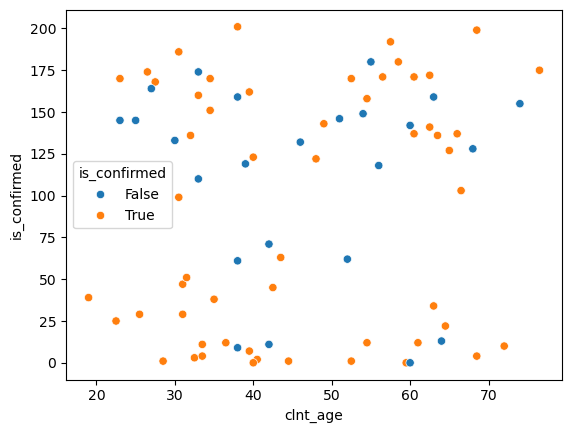

In [93]:
# filtered.groupby('clnt_age')['is_confirmed'].sum()
sns.scatterplot(y=filtered.groupby('clnt_age')['is_confirmed'].sum(), x=filtered['clnt_age'], hue=filtered['is_confirmed'])

<Axes: xlabel='clnt_age', ylabel='Count'>

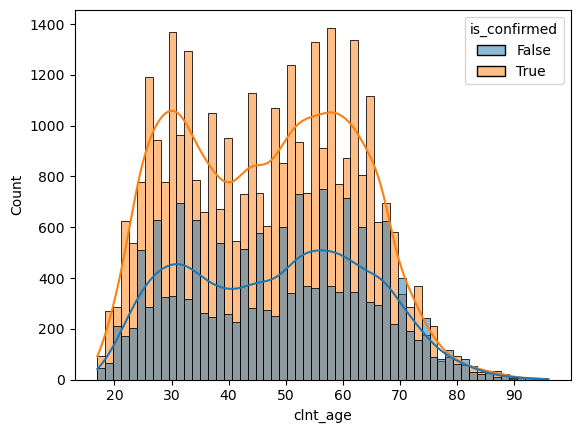

In [101]:
sns.histplot(x=filtered['clnt_age'], hue=filtered['is_confirmed'], kde=True)

<Axes: xlabel='clnt_tenure_yr', ylabel='Count'>

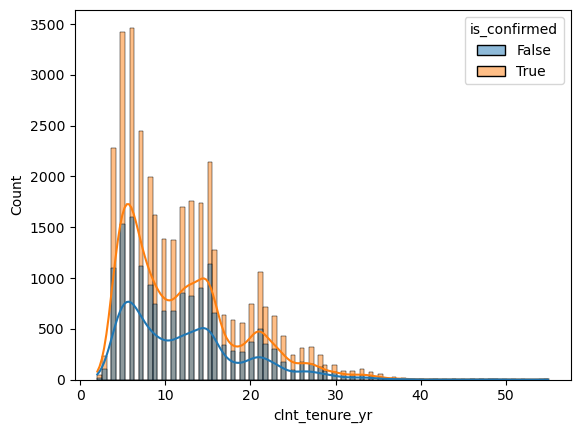

In [100]:
sns.histplot(x=filtered['clnt_tenure_yr'], hue=filtered['is_confirmed'],kde=True)

In [98]:
stats.ttest_ind(filtered['is_confirmed'], filtered['clnt_age'])

TtestResult(statistic=-675.0463793369908, pvalue=0.0, df=100968.0)

In [99]:
stats.ttest_ind(filtered['is_confirmed'], filtered['clnt_tenure_yr'])

TtestResult(statistic=-371.06904158324113, pvalue=0.0, df=100968.0)

## **Time Spent on Each Step:** The average duration users spend on each step

In [38]:
filtered

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,no_of_visits,is_confirmed,step_duration,time_in_min,no_of_confirms,had_error,error_count
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test,2,True,0 days 00:03:46,3.766667,3,False,0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control,1,True,0 days 00:00:59,0.983333,1,False,0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,Test,2,False,0 days 00:00:39,0.650000,0,True,1
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,Test,1,False,0,0.000000,0,False,0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,Control,1,False,0,0.000000,0,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50480,1780858,21.0,262.0,68.5,M,3.0,372100.59,6.0,9.0,Test,2,True,0 days 00:01:29.400000,1.490000,2,False,0
50481,6967120,21.0,260.0,68.5,M,3.0,4279873.38,6.0,9.0,Control,1,True,0 days 00:00:49.750000,0.829167,1,False,0
50482,5826160,20.0,249.0,56.5,F,2.0,44837.16,2.0,5.0,Test,3,True,0 days 00:01:35,1.583333,6,False,0
50483,8739285,19.0,229.0,69.5,F,2.0,44994.24,1.0,4.0,Test,1,True,0 days 00:02:53,2.883333,1,False,0


In [103]:
#filtered['error_count'].value_counts()

In [102]:
#filtered.dtypes

<Axes: xlabel='time_in_min', ylabel='Count'>

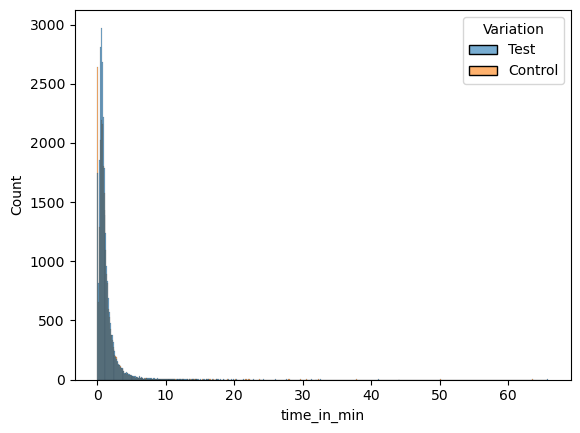

In [54]:
sns.histplot(data=filtered, x='time_in_min', hue = "Variation",  multiple="layer", bins=500, alpha=0.6)
#plt.xlim(-1,10)

In [135]:
# pd.DataFrame({"Control" : clients[clients['Variation']=='Control']['process_step'].value_counts(), "Test" : tclients[clients['Variation']=='Test']['process_step'].value_counts(), "Unknowns" : clients[clients['Variation']=='Unknown']['process_step'].value_counts()})

In [104]:
stats.ttest_ind(test['time_in_min'], control['time_in_min']).pvalue

0.027653778236822572

In [105]:
stats.ttest_ind(test['had_error'], control['had_error']).pvalue

5.512562058750981e-16

In [106]:
stats.ttest_ind(test['error_count'], control['error_count']).pvalue 

2.573121425492731e-40

In [112]:
filtered.groupby('Variation')['had_error'].sum()

Variation
Control     8074
Test       10188
Name: had_error, dtype: int64